# Lab 3: Feature Selection - Filter Method

<h2 style="text-align: center;">Name: Neelanajn Dutta </h2>

<h2 style="text-align: center;">Registration number: 2448040 </h2>

### Importing libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import fetch_california_housing

### Loading the california housing dataset:

In [3]:
data=fetch_california_housing()
X=pd.DataFrame(data.data, columns=data.feature_names)
Y=data.target

### Exploratory Data Analysis(EDA):

In [4]:
print("Dataset Information: \n")
X.info()

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [5]:
print("Summary Statistics: \n")
X.describe()

Summary Statistics: 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Interpretation:

The summary statistics provide insights into the distribution of features in the California housing dataset: <br>
The <b>median income (MedInc)</b> ranges from 0.5 to 15, with an average of 3.87, indicating a right-skewed distribution.<br>
<b>House age (HouseAge)</b> has a median of 29 years, suggesting many houses are older. <br>
<b>Average rooms (AveRooms)</b> and <b>average bedrooms (AveBedrms)</b> show reasonable means, but the maximum values (141.9 rooms and 34 bedrooms) suggest potential outliers. <br>
<b>Population</b> varies significantly, with some areas having very large values (up to 35,682), affecting the average household size <b>(AveOccup)</b>, which has extreme values too. <br>
<b>Latitude</b> and <b>Longitude</b> indicate that houses are spread across California, with locations ranging from 32.54° to 41.95° latitude and -124.35° to -114.31° longitude.<br>

In [6]:
print("Checking missing values: \n")
X.isnull().sum()

Checking missing values: 



MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Interpretation: There is no missing values in the dataset

### Correlation heatmap:

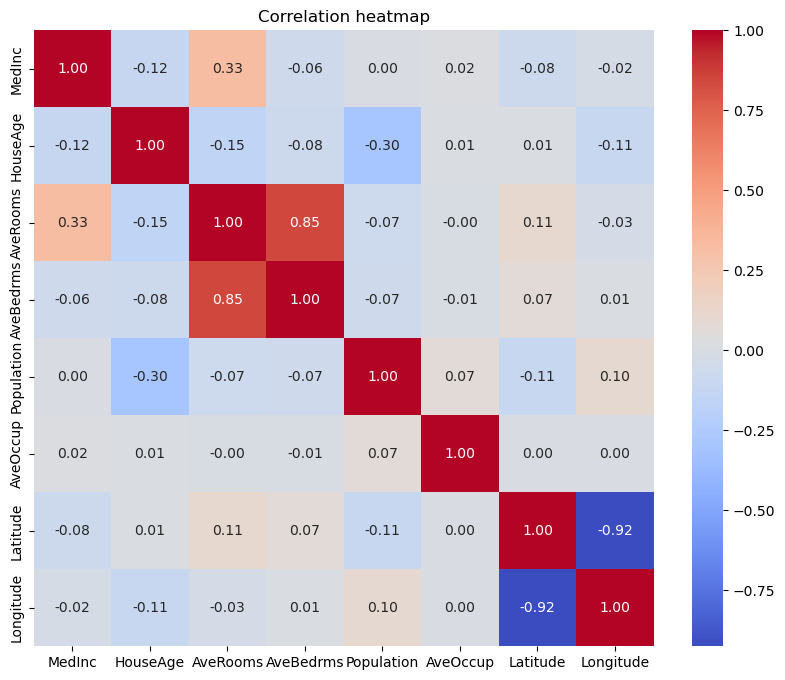

In [7]:
plt.figure(figsize=(10,8))
correlation_matrix=X.corr()
sb.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation heatmap")
plt.show()

## Feature Selection:

Feature selection is the process of selecting a subset of relevant features (variables, predictors) from the dataset to improve model performance by reducing overfitting, enhancing interpretability, and speeding up computation. It helps in removing redundant, irrelevant, or noisy features.

## There are three methods of feature selection:
###    (i) Filter method
###    (ii) Wrapper method
###    (iii) Embedded method

<b>Filter method:</b> The Filter Method is one of the three main approaches for feature selection (along with Wrapper and Embedded methods). It selects features based on statistical scores without involving any machine learning model. This makes it computationally efficient and useful for high-dimensional datasets.The various methods under filter method are listed below:

## (a) Variance threshold:
       A simple feature selection method that removes features with low variance, assuming that low-variance features do not contribute much useful information.

In [8]:
from sklearn.feature_selection import VarianceThreshold
var_threshold=0.5 # we adjust this threshold to observe different results
selector=VarianceThreshold(threshold=var_threshold)
X_var_selected=selector.fit_transform(X)
#Retrieve the feature name after selection using support_attribute
features_var=X.columns[selector.get_support()]
print(f"""\nVariance Threshold (threshold={var_threshold}):
      Original features: {X.shape[1]},
      Selected features: {X_var_selected.shape[1]}""")
print("Selected feature names:", features_var.tolist())


Variance Threshold (threshold=0.5):
      Original features: 8,
      Selected features: 7
Selected feature names: ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## (b) Information Gain:
        Measures how much knowing the value of a feature reduces uncertainty about the target variable.

In [9]:
from sklearn.feature_selection import mutual_info_classif
Y_discrete = pd.qcut(pd.Series(Y), q=10, duplicates='drop').cat.codes
info_gain_threshold_value = 0.5  
info_gain_scores = mutual_info_classif(X, Y_discrete, random_state=0)
features_info = X.columns[info_gain_scores > 
                          info_gain_threshold_value].tolist()
X_info_selected = X[features_info]
print(f"""\nInformation Gain Threshold (threshold={info_gain_threshold_value
}):
      Original features: {X.shape[1]},
      Selected features: {X_info_selected.shape[1]}""")
print("Information Gain scores:", dict(zip(X.columns, info_gain_scores)))
print("Selected feature names:", features_info)


Information Gain Threshold (threshold=0.5):
      Original features: 8,
      Selected features: 0
Information Gain scores: {'MedInc': 0.35482259780250613, 'HouseAge': 0.021166883635522993, 'AveRooms': 0.07996209236638485, 'AveBedrms': 0.012348216582921179, 'Population': 0.005964178832859712, 'AveOccup': 0.06491782117169986, 'Latitude': 0.3391098706227331, 'Longitude': 0.3735291778133796}
Selected feature names: []


## (c) Correlation threshold:
           Measures the linear relationship between features and can be used to remove highly correlated features to avoid redundancy.

In [93]:
def correlation_threshold(X, threshold):
    corr_matrix = X.corr().abs()
    # Select the upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    # Identify features with any correlation above the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return X.drop(columns=to_drop, axis=1)

corr_threshold = 0.9  # Modify as needed
X_corr_selected = correlation_threshold(X, threshold=corr_threshold)
print(f"""\nCorrelation Threshold (threshold={corr_threshold}):
      Original features: {X.shape[1]},
      Selected features: {X_corr_selected.shape[1]}""")
print("Selected feature names:", X_corr_selected.columns.tolist())


Correlation Threshold (threshold=0.9):
      Original features: 8,
      Selected features: 7
Selected feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude']


## (d) MAD (Mean Absolute Deviation):
           Mean Absolute Deviation (MAD) can be used for feature selection by identifying and removing low-variance features. Features with very low MAD values contribute little variation and may not be useful for the model.

In [94]:
mad_threshold_value = 0.7  # Modify to see different effects
# Manually compute the MAD for each feature
mad_values = X.apply(lambda col: np.mean(np.abs(col - col.mean())))
X_mad_selected = mad_values[mad_values > mad_threshold_value].index
print(f"""\nMAD Threshold = {mad_threshold_value}:
      Original features: {X.shape[1]},
      Selected features: {X_corr_selected.shape[1]}""")
print("Selected feature names:", X_mad_selected)


MAD Threshold = 0.7:
      Original features: 8,
      Selected features: 7
Selected feature names: Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')


## (e) Mutual Information threshold:
         Mutual Information (MI) measures how much knowing the value of a feature reduces uncertainty about the target variable. It captures both linear and nonlinear relationships between features and the target.

In [95]:
from sklearn.feature_selection import mutual_info_regression
mi_threshold = 0.1  # Adjust this threshold to observe different results
mi_scores = mutual_info_regression(X, Y, random_state=0)
features_mi = X.columns[mi_scores > mi_threshold].tolist()
X_mi_selected = X[features_mi]
print(f"""\nMutual Information Threshold (threshold= {mi_threshold}:
      Original features: {X.shape[1]},
      Selected features: {X_mi_selected.shape[1]}""")
print("Mutual Information scores:", dict(zip(X.columns, mi_scores)))
print("Selected feature names:", features_mi)


Mutual Information Threshold (threshold= 0.1:
      Original features: 8,
      Selected features: 4
Mutual Information scores: {'MedInc': 0.38764599736258987, 'HouseAge': 0.03211428841517261, 'AveRooms': 0.10362300978707584, 'AveBedrms': 0.024482416222303627, 'Population': 0.021994088616336782, 'AveOccup': 0.07254907984228254, 'Latitude': 0.3706566756286751, 'Longitude': 0.4018195828289901}
Selected feature names: ['MedInc', 'AveRooms', 'Latitude', 'Longitude']


In [96]:
# 5. Mutual Information Threshold
def mutual_info_threshold(X, Y, threshold):
    mi_scores = mutual_info_regression(X, y, random_state=0)
    kept_features = X.columns[mi_scores > threshold].tolist()
    print("Mutual Information scores:", dict(zip(X.columns, mi_scores)))
    return X[kept_features], kept_features

In [97]:
# Precompute the mutual information scores once
info_gain_scores = mutual_info_classif(X, y_discrete, random_state=0)
mi_scores = mutual_info_regression(X, Y, random_state=0)

# Threshold Sensitivity Analysis
# For Variance, MAD, Information Gain, and Mutual Information, we consider thresholds from 0.1 to 5 (increasing thresholds)
thresholds = np.linspace(0.1, 5, 50)
selected_features_var = []
selected_features_mad = []
selected_features_info_gain = []
selected_features_mutual_info = []

for t in thresholds:
    # Variance Threshold
    selector = VarianceThreshold(threshold=t)
    X_var = selector.fit_transform(X)
    selected_features_var.append(X_var.shape[1])
    
    # MAD Threshold
    X_mad = mad_values[mad_values > t].index
    selected_features_mad.append(len(X_mad))
    
    # Information Gain Threshold using precomputed info_gain_scores
    feats_info = X.columns[info_gain_scores > t].tolist()
    selected_features_info_gain.append(len(feats_info))
    
    # Mutual Information Threshold using precomputed mi_scores
    feats_mi = X.columns[mi_scores > t].tolist()
    selected_features_mutual_info.append(len(feats_mi))
    
# For Correlation Threshold, as the threshold increases, the condition is less strict.
# To show a descending trend, we reverse the threshold order (i.e. stricter thresholds from 5 down to 0.1)
thresholds_corr = np.linspace(5, 0.1, 50)
selected_features_corr = []
for t in thresholds_corr:
    X_corr = correlation_threshold(X, threshold=t)
    selected_features_corr.append(X_corr.shape[1])

In [98]:
# Horizontal line at 8 initial features
init_line = 8

### Visualizing all the methods:

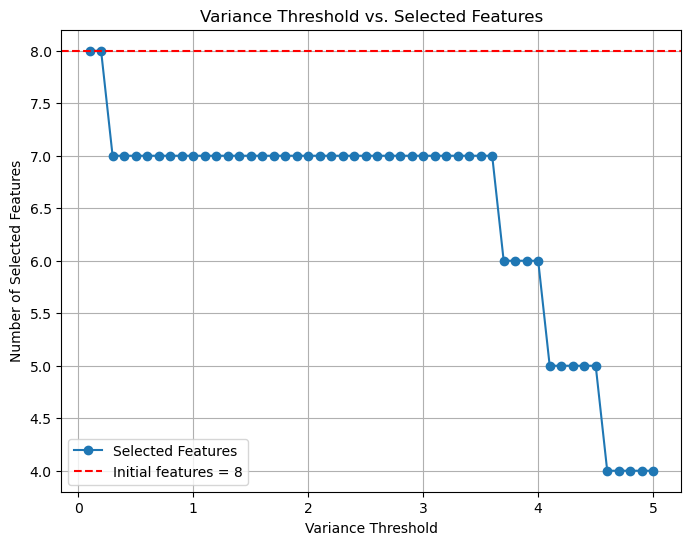

In [99]:
# Graph 1: Variance Threshold vs. Number of Selected Features
plt.figure(figsize=(8, 6))
plt.plot(thresholds, selected_features_var, marker='o', label='Selected Features')
plt.axhline(y=8, color='r', linestyle='--', label='Initial features = 8')
plt.xlabel('Variance Threshold')
plt.ylabel('Number of Selected Features')
plt.title('Variance Threshold vs. Selected Features')
plt.legend()
plt.grid(True)
plt.show()

## Interpretation:
       As the variance threshold increases, the number of selected features decreases, meaning that low-variance features are removed first. Initially, most features are retained, but after a threshold of 3, the number of features drops significantly, leaving only high-variance ones.

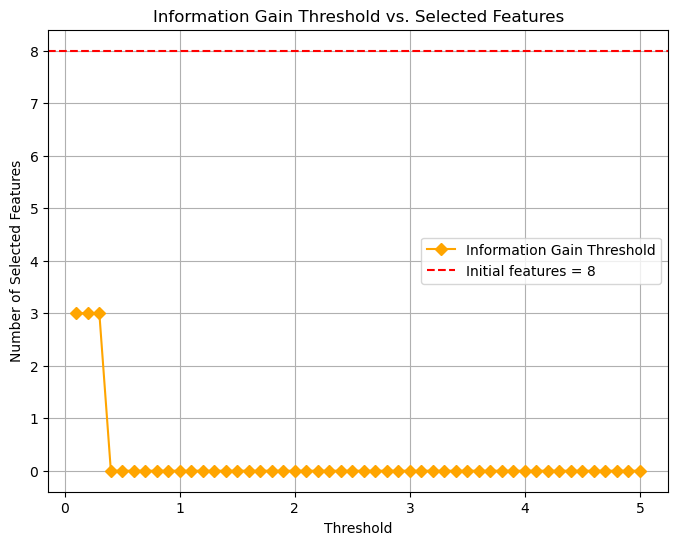

In [100]:
# Graph 2: Information Gain Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, selected_features_info_gain, marker='D', color='orange', label='Information Gain Threshold')
plt.axhline(y=init_line, color='r', linestyle='--', label='Initial features = 8')
plt.xlabel('Threshold')
plt.ylabel('Number of Selected Features')
plt.title('Information Gain Threshold vs. Selected Features')
plt.legend()
plt.grid(True)
plt.show()

## Interpretation:
     The information gain threshold method eliminates features with little predictive power. A strict threshold quickly reduces the number of selected features, keeping only those that significantly contribute to predicting the target.

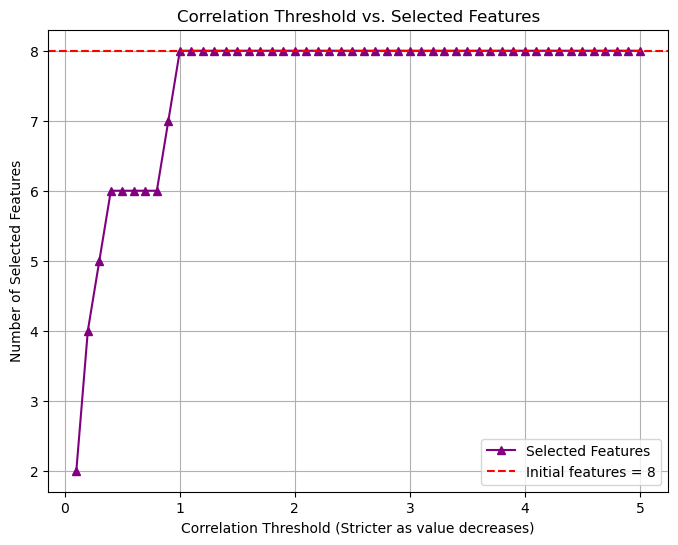

In [101]:
# Graph 3: Correlation Threshold vs. Number of Selected Features
# Here, the x-axis is the threshold value (in descending order, representing stricter correlation criteria)
plt.figure(figsize=(8, 6))
plt.plot(thresholds_corr, selected_features_corr, marker='^', color='purple', label='Selected Features')
plt.axhline(y=8, color='r', linestyle='--', label='Initial features = 8')
plt.xlabel('Correlation Threshold (Stricter as value decreases)')
plt.ylabel('Number of Selected Features')
plt.title('Correlation Threshold vs. Selected Features')
plt.legend()
plt.grid(True)
plt.show()

## Interpretation:
       The correlation threshold method removes highly correlated features to avoid redundancy. A strict threshold removes many features, while a relaxed threshold retains most features, leading to more comprehensive feature selection.

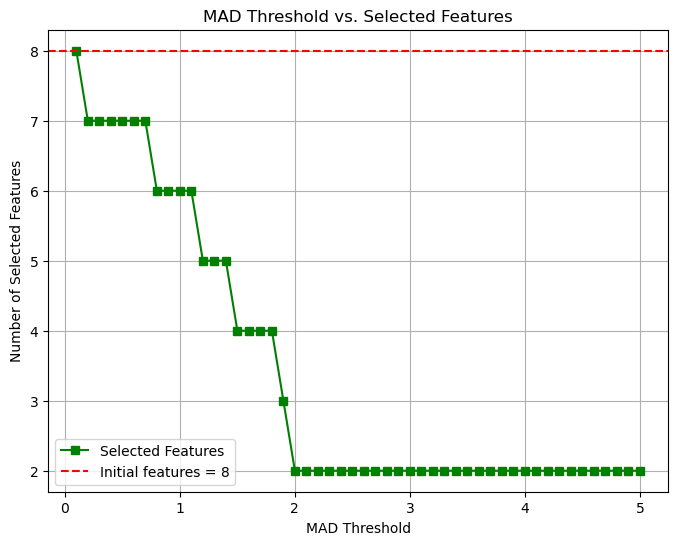

In [102]:
# Graph 4: MAD Threshold vs. Number of Selected Features
plt.figure(figsize=(8, 6))
plt.plot(thresholds, selected_features_mad, marker='s', color='green', label='Selected Features')
plt.axhline(y=8, color='r', linestyle='--', label='Initial features = 8')
plt.xlabel('MAD Threshold')
plt.ylabel('Number of Selected Features')
plt.title('MAD Threshold vs. Selected Features')
plt.legend()
plt.grid(True)
plt.show()

## Interpretation:
        The MAD threshold removes features with low dispersion, which means they do not vary much across samples. Higher thresholds keep only features with significant variation, improving feature selection.

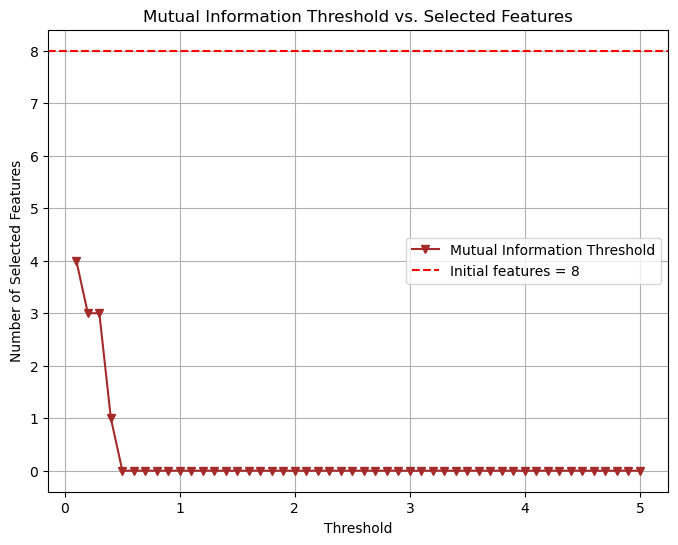

In [103]:
# Graph 5: Mutual Information Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, selected_features_mutual_info, marker='v', color='brown', label='Mutual Information Threshold')
plt.axhline(y=init_line, color='r', linestyle='--', label='Initial features = 8')
plt.xlabel('Threshold')
plt.ylabel('Number of Selected Features')
plt.title('Mutual Information Threshold vs. Selected Features')
plt.legend()
plt.grid(True)
plt.show()

## Interpretation:
      Mutual information thresholding removes features that share little information with the target variable. A higher threshold quickly reduces the feature set, keeping only those that contribute significantly to predictive power.

### Model Training and Accuracy Evaluation After Feature Selection:

In [16]:
# Model Training and Accuracy Evaluation After Feature Selection

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Split data into training and testing sets BEFORE feature selection
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Linear Regression model using ALL features
model_all = LinearRegression()
model_all.fit(X_train, Y_train)
Y_pred_all = model_all.predict(X_test)

# Select features using Mutual Information (as an example)
X_selected = X[features_mi]  # Use only selected features

# Split data into training and testing sets AFTER feature selection
X_train_sel, X_test_sel, Y_train_sel, Y_test_sel = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

# Train Linear Regression model using SELECTED features
model_selected = LinearRegression()
model_selected.fit(X_train_sel, Y_train_sel)
Y_pred_selected = model_selected.predict(X_test_sel)

# Evaluate models using R² score and Mean Squared Error (MSE)
r2_all = r2_score(Y_test, Y_pred_all)  # R² score for all features
r2_selected = r2_score(Y_test_sel, Y_pred_selected)  # R² score for selected features

mse_all = mean_squared_error(Y_test, Y_pred_all)  # MSE for all features
mse_selected = mean_squared_error(Y_test_sel, Y_pred_selected)  # MSE for selected features

# Print evaluation results
print(f"R² Score (All Features): {r2_all:.4f}")
print(f"R² Score (Selected Features): {r2_selected:.4f}")
print(f"MSE (All Features): {mse_all:.4f}")
print(f"MSE (Selected Features): {mse_selected:.4f}")

R² Score (All Features): 0.5758
R² Score (Selected Features): 0.5724
MSE (All Features): 0.5559
MSE (Selected Features): 0.5604
